In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow.keras.layers import Dense, Flatten, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical

TensorFlow version: 2.5.0


In [14]:
# read train 
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# read test 
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

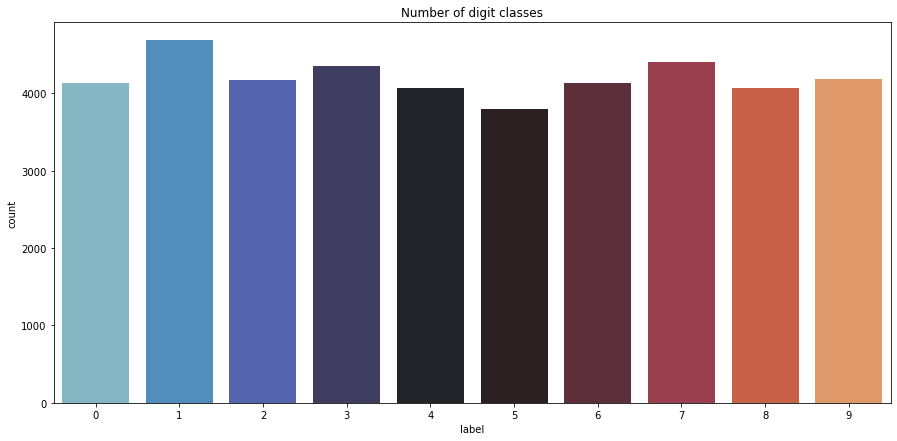

In [18]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

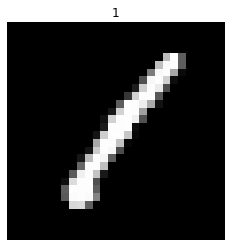

In [23]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

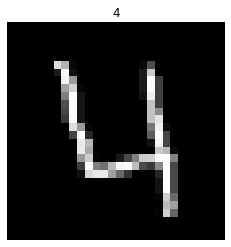

In [24]:
# plot some samples
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [25]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [27]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
test.iloc[0, 510:520]

pixel510    0.992157
pixel511    0.992157
pixel512    0.741176
pixel513    0.388235
pixel514    0.000000
pixel515    0.125490
pixel516    0.792157
pixel517    0.992157
pixel518    0.992157
pixel519    0.992157
Name: 0, dtype: float64

In [33]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [35]:
# Label Encoding 
Y_train = to_categorical(Y_train, num_classes = 10)

In [37]:
Y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [38]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


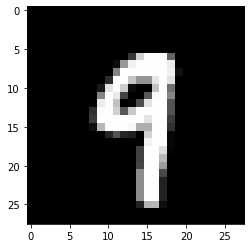

In [39]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [41]:
model = tf.keras.Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [42]:
# Compile the model
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics=["accuracy"])

In [89]:
X_train.shape[0] // 250

151

In [90]:
X_train.shape[0]

37800

In [91]:
X_val.shape

(4200, 28, 28, 1)

In [92]:
Y_val.shape

(4200, 10)

In [48]:
# Fit the model
history = model.fit(X_train, 
                    Y_train, 
                    batch_size=250,
                    epochs = 10, 
                    validation_data = (X_val,Y_val), 
                    steps_per_epoch= X_train.shape[0] // 250, 
                    verbose=1)

Epoch 1/10
151/151 [==============================] - 1s 10ms/step - loss: 0.6875 - accuracy: 0.7851 - val_loss: 0.1945 - val_accuracy: 0.9450
Epoch 2/10
151/151 [==============================] - 1s 8ms/step - loss: 0.2342 - accuracy: 0.9281 - val_loss: 0.1246 - val_accuracy: 0.9629
Epoch 3/10
151/151 [==============================] - 1s 7ms/step - loss: 0.1761 - accuracy: 0.9446 - val_loss: 0.0919 - val_accuracy: 0.9690
Epoch 4/10
151/151 [==============================] - 1s 8ms/step - loss: 0.1482 - accuracy: 0.9542 - val_loss: 0.0833 - val_accuracy: 0.9733
Epoch 5/10
151/151 [==============================] - 1s 8ms/step - loss: 0.1328 - accuracy: 0.9595 - val_loss: 0.0684 - val_accuracy: 0.9755
Epoch 6/10
151/151 [==============================] - 1s 8ms/step - loss: 0.1192 - accuracy: 0.9623 - val_loss: 0.0631 - val_accuracy: 0.9781
Epoch 7/10
151/151 [==============================] - 1s 7ms/step - loss: 0.1110 - accuracy: 0.9651 - val_loss: 0.0601 - val_accuracy: 0.9795
Epoch

In [69]:
[i for i in history.history.keys()]

['loss', 'accuracy', 'val_loss', 'val_accuracy']

In [71]:
[i for i in history.history.items()]

[('loss',
  [0.6875272393226624,
   0.23420625925064087,
   0.1761365681886673,
   0.14823852479457855,
   0.13284023106098175,
   0.11916561424732208,
   0.11103321611881256,
   0.0988299772143364,
   0.09558327496051788,
   0.08815626055002213]),
 ('accuracy',
  [0.7850860953330994,
   0.9280692338943481,
   0.9445539116859436,
   0.9541944265365601,
   0.9595472812652588,
   0.9623169302940369,
   0.9651398062705994,
   0.9682822823524475,
   0.9703861474990845,
   0.9721970558166504]),
 ('val_loss',
  [0.1945447474718094,
   0.12460963428020477,
   0.09194814413785934,
   0.08330213278532028,
   0.06843065470457077,
   0.06308583915233612,
   0.06005851924419403,
   0.05502215027809143,
   0.0534510463476181,
   0.04995584115386009]),
 ('val_accuracy',
  [0.9449999928474426,
   0.9628571271896362,
   0.9690476059913635,
   0.9733333587646484,
   0.9754762053489685,
   0.9780952334403992,
   0.9795238375663757,
   0.9814285635948181,
   0.9833333492279053,
   0.9833333492279053])]

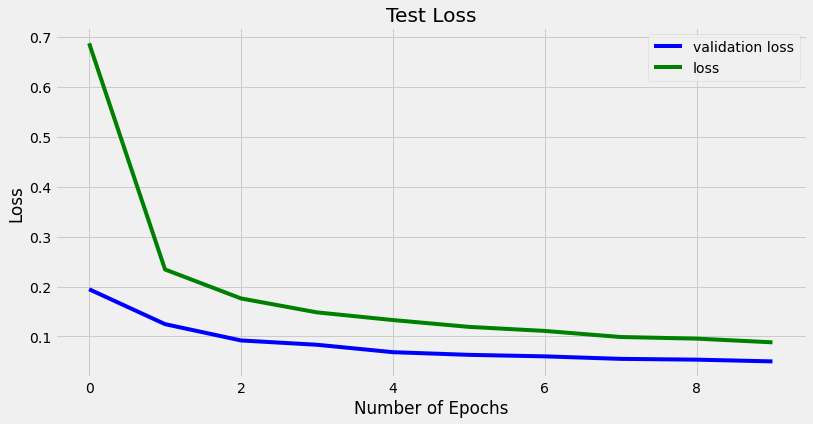

In [95]:
# Plot the loss and accuracy curves for training and validation 
plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.plot(history.history['loss'], color='g', label="loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

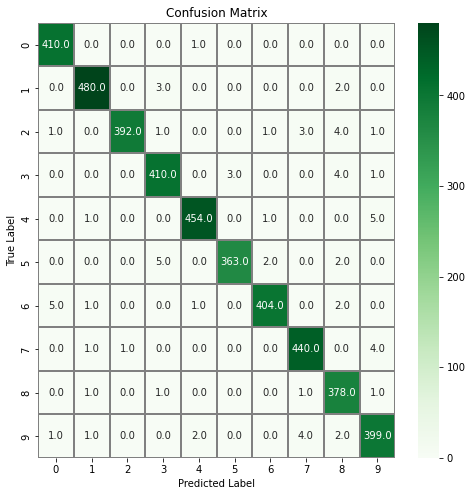

In [50]:
# confusion matrix
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [51]:
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

In [57]:
Y_pred_classes[:20]

array([6, 9, 5, 7, 9, 2, 3, 3, 7, 0, 6, 9, 1, 8, 2, 4, 1, 9, 4, 1],
      dtype=int64)

In [56]:
np.argmax(Y_val,axis = 1)[:20]

array([6, 9, 5, 7, 9, 2, 3, 3, 7, 0, 6, 9, 1, 8, 2, 4, 1, 9, 4, 1],
      dtype=int64)

# Prediction on Test Data

In [80]:
# Predict the values from the validation dataset
test_pred = model.predict(test)
# Convert predictions classes to one hot vectors 
test_pred_classes = np.argmax(test_pred,axis = 1) 

In [82]:
test_pred_classes[:20]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0],
      dtype=int64)

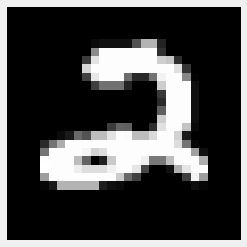

In [86]:
plt.imshow(test[0][:,:,0],cmap='gray')
plt.axis("off")
plt.show()

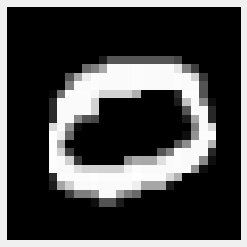

In [87]:
plt.imshow(test[1][:,:,0],cmap='gray')
plt.axis("off")
plt.show()

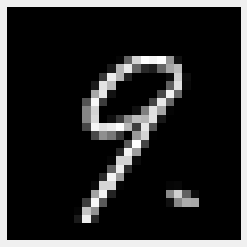

In [88]:
plt.imshow(test[2][:,:,0],cmap='gray')
plt.axis("off")
plt.show()